In [783]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as ss

import sys, os
sys.path.append('../../src/')
# import toolbox
from toolbox import *

result_names = ['BBT_Tiingo',                #0
                'BBT_future_Tiingo_ada', 
                'BBT_future_Tiingo_eth',     #2
                'BBT_future_Tiingo_ltc',
                'BBT_future_Tiingo_xrp',     #4
                'BBT_future_BITX',
                'BBT_future_BITW20',         #6
                'BBT_future_BITW70', 
                'BBT_future_BITW100',        #8
                'BBT_future_CRIX']

risk_measures = ['Variance',
                 'ES q=0.05', 'ES q=0.01',
                 'VaR q=0.05', 'VaR q=0.01', 
                 'ERM k=10', 'CH']

In [826]:
i = 5

rh_df = []
h_df = []
path = '../../results/%s/MM/rh_%s_copula_selection.csv'%(result_names[i],
                                                             risk_measures[0])
Date = pd.to_datetime(pd.read_csv(path).Date)

for rm in risk_measures[:-1]:
    path = '../../results/%s/MM/rh_%s_copula_selection.csv'%(result_names[i],
                                                             rm)
    _df = pd.read_csv(path)
    
    rh_df.append(_df.rh)
    h_df.append(_df.h)
    
rh_df = pd.concat(rh_df, axis=1)
rh_df.columns=risk_measures[:-1]

h_df = pd.concat(h_df, axis=1)
h_df.columns=risk_measures[:-1]

In [827]:
CH_OHR = pd.read_csv('../../results/%s/MM/rh_cross_hedge.csv'%result_names[i])
h_df.loc[:,'CH'] = CH_OHR.h
rh_df.loc[:,'CH'] = CH_OHR.rh

Text(0, 0.5, 'OHR')

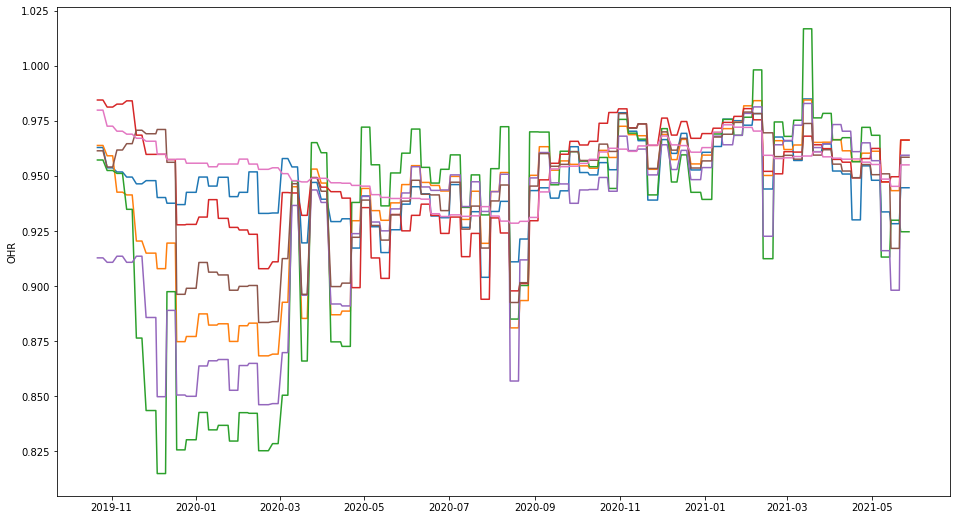

In [828]:
plt.figure(figsize=(16,9))
plt.plot(Date, h_df)
plt.ylabel('OHR')

In [829]:
def get_block_min(r, step_size):
    M_arr = []
    for i in range(0, len(df1), step_size):
        if i+step_size >= len(df1):
            break
        else:
            M = np.min(r[i:i+step_size])
            M_arr.append(M)
            
    return M_arr

In [830]:
rh_df

,Variance,ES q=0.05,ES q=0.01,VaR q=0.05,VaR q=0.01,ERM k=10,CH
0,0.003129,0.002986,0.003260,0.002986,0.003032,0.003038,0.003060
1,0.021261,0.020554,0.021913,0.020554,0.020779,0.020808,0.020922
2,0.001030,0.002377,-0.000214,0.002377,0.001949,0.001892,0.001675
3,0.009688,0.007647,0.011573,0.007647,0.008296,0.008381,0.008710
4,-0.029930,-0.027575,-0.032104,-0.027575,-0.028323,-0.028422,-0.028801
...,...,...,...,...,...,...,...
400,-0.011641,-0.011780,-0.010789,-0.014876,-0.004120,-0.011415,-0.014187
401,0.006248,0.006249,0.006244,0.006262,0.006215,0.006247,0.006259
402,0.002567,0.002653,0.002044,0.004555,-0.002052,0.002429,0.004131
403,-0.000804,-0.000802,-0.000818,-0.000752,-0.000925,-0.000807,-0.000763


Variance -0.0775674005442671
ES q=0.05 -0.0762107032888587
ES q=0.01 -0.0774244578841237
VaR q=0.05 -0.075639328406745
VaR q=0.01 -0.080298871579667
ERM k=10 -0.078581466219707
CH -0.0760333160246437


/Users/francis/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


Text(0, 0.5, '$\\log\\{1-F(M)\\}$')

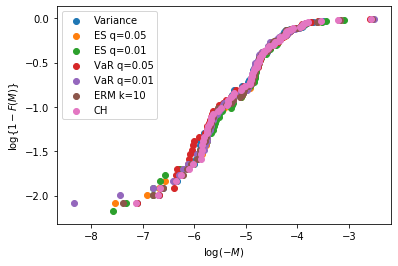

In [831]:
Ms = []
step_size=5

for rm in risk_measures:
    Ms.append(np.array(get_block_min(rh_df.loc[:,rm], step_size)))
    
for i, M in enumerate(Ms):
    ecdf = ECDF(M)
    x = np.sort(M)
    print(risk_measures[i], np.nanmin(M))
    plt.scatter(np.log(-x), np.log(1-ecdf(x)), label=risk_measures[i])
#     plt.scatter(x,ecdf(x), label=risk_measures[i])
plt.legend()
plt.xlabel(r'$\log(-M)$')
plt.ylabel(r'$\log\{1-F(M)\}$')

In [824]:
thres = -0.005
erh1 = df1.rh[df1.rh < thres]
erh2 = df2.rh[df2.rh < thres]
print(len(erh1), len(erh2))

78 75


/Users/francis/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/francis/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/francis/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/francis/opt/anaconda3/lib/python3.7/site-pack

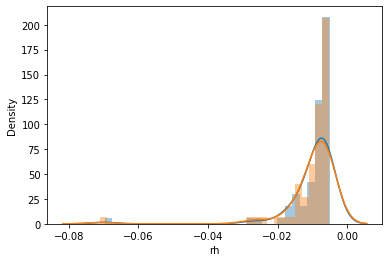

In [825]:
sns.distplot(erh1)
sns.distplot(erh2)

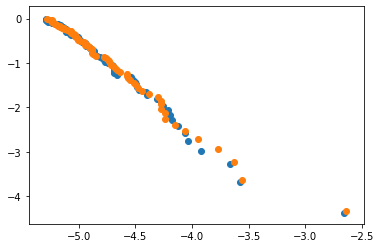

In [723]:
ecdf1 = ECDF(-erh1)
ecdf2 = ECDF(-erh2)

x = -np.sort(erh1)
y = -np.sort(erh2)

plt.scatter(np.log(x), np.log(1-ecdf1(x)))
plt.scatter(np.log(y), np.log(1-ecdf2(y)))

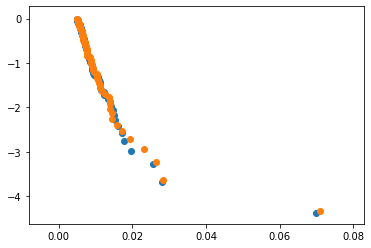

In [623]:
plt.scatter(x, np.log(1-ecdf1(x)))
plt.scatter(y, np.log(1-ecdf2(y)))